# Задание 1: В папке находится изображение railway.jpeg с железной дорогой, уходящей вдаль от камеры. Необходимо, используя перспективное преобразование, развернуть дорогу таким образом, чтобы она была непосредственно перед нами.




In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(<Axes: title={'center': 'leveling'}>,
 Text(0.5, 1.0, 'leveling'))

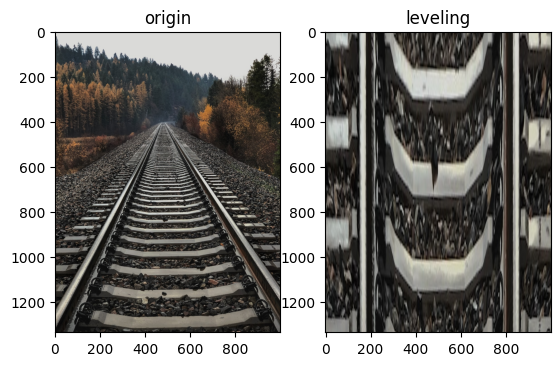

In [48]:
img = cv2.cvtColor(cv2.imread("railway.jpeg"), cv2.COLOR_BGR2RGB)
height, width, _ = img.shape
pts1 = [
    [146, 796],
    [852, 785],
    [44, 916],
    [965, 903],
]
pts2 = [
    [0, 0],
    [width, 0],
    [0, height],
    [width, height],
]
M = cv2.getPerspectiveTransform(np.float32(pts1), np.float32(pts2))
img_res = cv2.warpPerspective(img, M, (width, height))
plt.subplot(121), plt.imshow(img), plt.title('origin')
plt.subplot(122), plt.imshow(img_res), plt.title('leveling')

# Задание 2: В папке находится изображение palm.png с пальмой. Используя классические аффинные преобразования, необходимо создать "тень" для этой пальмы и отрисовать ее с ней на одном рисунке. Пример результата находится в изображении palm_result.png


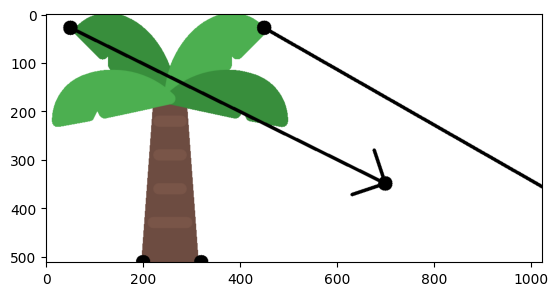

In [147]:
img = cv2.cvtColor(cv2.imread("palm.png"), cv2.COLOR_BGR2RGB)
plt.imshow(img)

height, width, _ = img.shape
width = int(width * 2)
pts1 = [
    [50, 30],
    [450, 30],
    [200, 512],
    [320, 512],
]
pts2 = [
    [700, 350],
    [1100, 400],
    [200, 512],
    [320, 512],
]
img_copy = np.full((height, width, 3),255, dtype=np.uint8)
img_copy[0:512, 0:512, :] = img
BLACK = (0, 0, 0)
for p1, p2 in zip(pts1, pts2):
    cv2.circle(img_copy, center=p1, radius=15, color=BLACK, thickness=-1)
    cv2.circle(img_copy, center=p2, radius=15, color=BLACK, thickness=-1)
    cv2.arrowedLine(img_copy, p1, p2, color=BLACK, thickness=6) 
    
plt.imshow(img_copy)

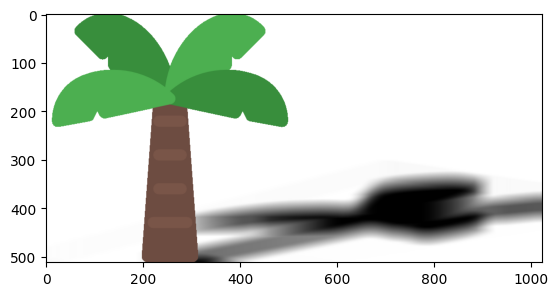

In [148]:
M = cv2.getPerspectiveTransform(np.float32(pts1), np.float32(pts2))
img_res = img.copy()
img_res = cv2.warpPerspective(img_res, M, (width, height))
img_res[img_res == 0] = 255
img_res[img_res != 255] = 0
img_res = cv2.blur(img_res,(40,40))
plt.imshow(img_res)

image2_final = img_res.copy()
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        if (img[x,y] != 255).any():
            image2_final[x,y] = img[x,y]
plt.imshow(image2_final, cmap="grey")